In [1]:
include("PVCR.jl");

## Residential Consumers
#### Generate Data and plot basic results. 

In [2]:
consumption_res = 300:50:1800
ui_res = []
ui_data_res = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_res)
    Result = Dict{String,Any}()
    ice_residential.econsumption = co; get_pmax(ice_residential);
    res = optimal_pv(ice_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVRes_opt = deepcopy(PVRes) 
    PVRes_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(ice_residential, PVRes_opt, SD);
    ui_data_res[co] = Result  
end

In [3]:
cumulative_impact_res = [(sum(ui_data_res[i]["Impact"]; dims =1)*discount_factor)./1e6 for (ix,i) in enumerate(consumption_res)];

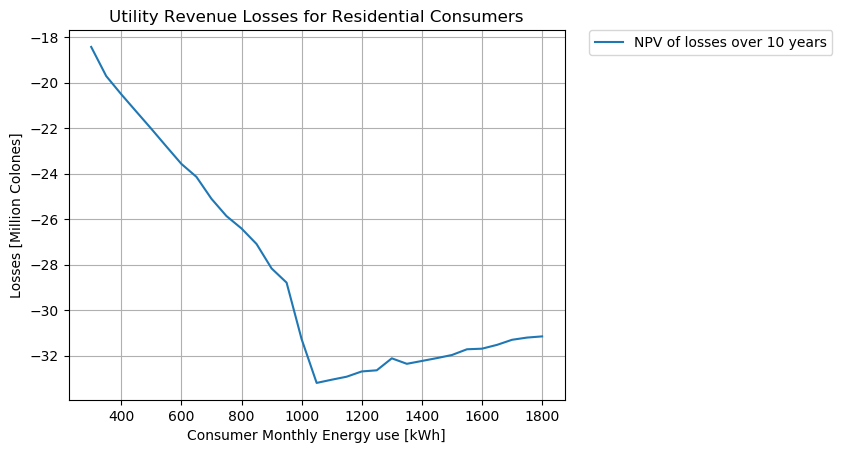

In [4]:
plot(consumption_res, cumulative_impact_res, label = "NPV of losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Residential Consumers")
grid("on");

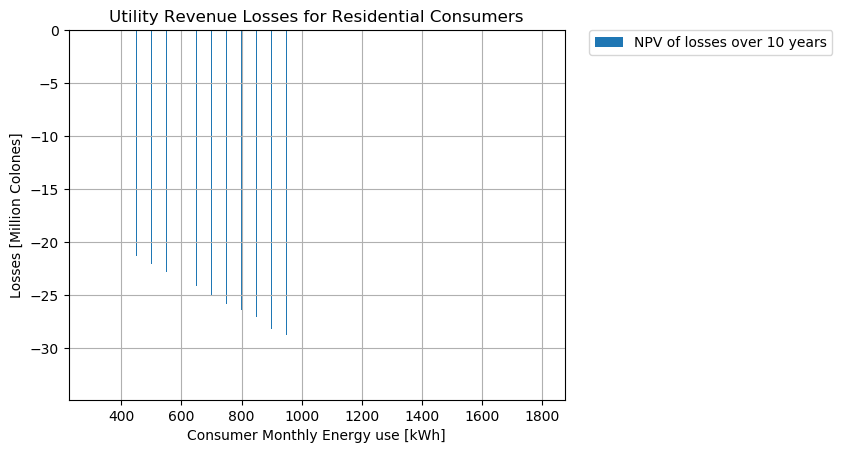

In [5]:
h = [i[1] for i in cumulative_impact_res]
bar(consumption_res, h, label = "NPV of losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Residential Consumers")
grid("on");

## Commercial Consumers
#### Generate Data and plot basic results. 

In [6]:
consumption_comind = consumption = exp10.(range(2.7, stop=4, length=150))
ui_comind = []
ui_data_comind = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_comind)
    Result = Dict{String,Any}()
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVComInd_opt = deepcopy(PVComInd) 
    PVComInd_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(ice_commercial, PVComInd_opt, SD);
    ui_data_comind[ix] = Result  
end

In [7]:
cumulative_impact_comind = [(sum(ui_data_comind[ix]["Impact"]; dims = 1)*discount_factor)./1e6 for (ix, co) in enumerate(consumption_comind)];

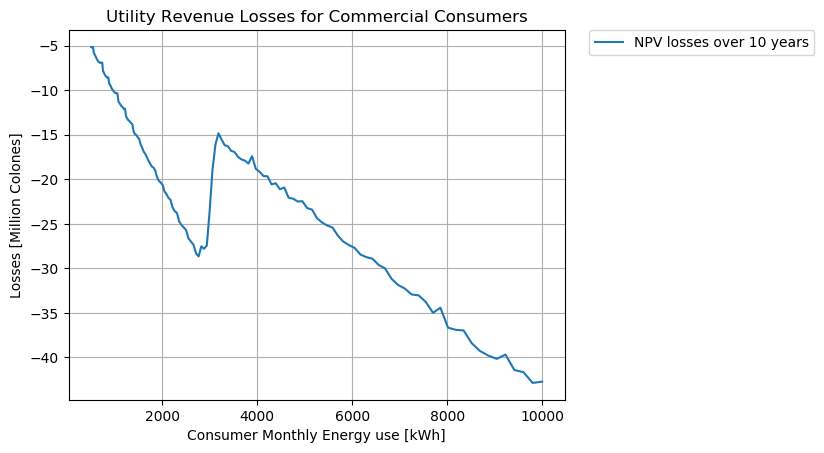

In [8]:
plot(consumption_comind, cumulative_impact_comind, label = "NPV losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Commercial Consumers")
grid("on");

## Medium Voltage Consumers
#### Generate Data and plot basic results.

In [9]:
consumption_tmt = exp10.(range(4, stop=6, length=150))
ui_tmt = []
ui_data_tmt = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_tmt)
    Result = Dict{String,Any}()
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVTMT, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVTMT_opt = deepcopy(PVTMT) 
    PVTMT_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(ice_mediumvoltage, PVTMT_opt, SD);
    ui_data_tmt[ix] = Result  
end

In [10]:
cumulative_impact_tmt = [(sum(ui_data_tmt[ix]["Impact"]; dims = 1)*discount_factor)./1e6 for (ix, co) in enumerate(consumption)];

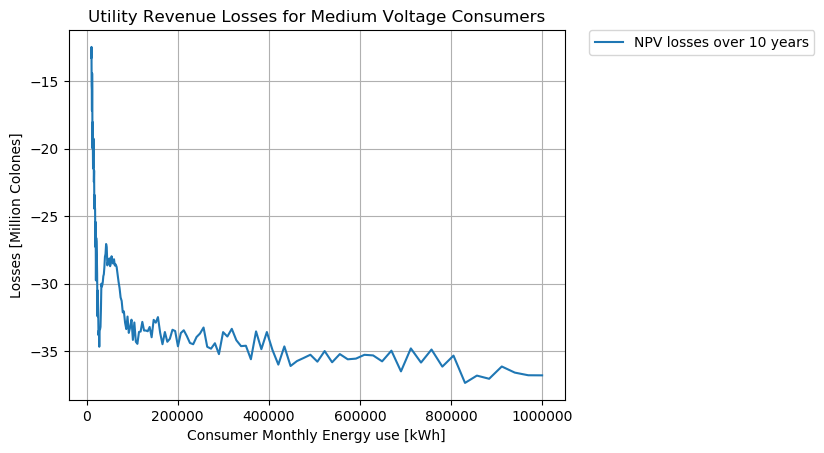

In [11]:
plot(consumption_tmt, cumulative_impact_tmt, label = "NPV losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Medium Voltage Consumers")
grid("on");

## Commercial Consumers - Alternative System
#### Generate Data and plot basic results. 

In [12]:
ice_commercial.tariff = A_CI_ICE
consumption_comind = consumption = exp10.(range(2.7, stop=4, length=150))
ui_comind = []
ui_data_comind = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_comind)
    Result = Dict{String,Any}()
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVComInd_opt = deepcopy(PVComInd) 
    PVComInd_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(ice_commercial, PVComInd_opt, SD);
    ui_data_comind[ix] = Result  
end

In [13]:
cumulative_impact_comind = [(sum(ui_data_comind[ix]["Impact"]; dims = 1)*discount_factor)./1e6 for (ix, co) in enumerate(consumption_comind)];

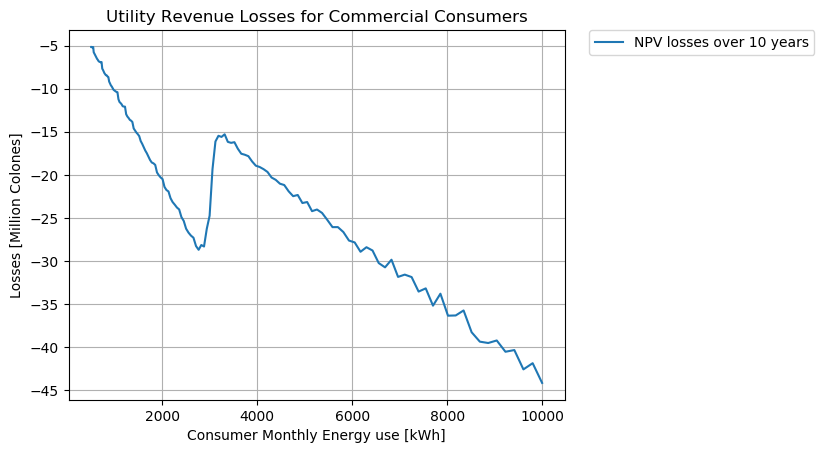

In [18]:
plot(consumption_comind, cumulative_impact_comind, label = "NPV losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Commercial Consumers")
grid("on");

## Medium Voltage Consumers - Alternative System
#### Generate Data and plot basic results.

In [15]:
ice_mediumvoltage.tariff = A_TMT_ICE
consumption_tmt = exp10.(range(4, stop=6, length=150))
ui_tmt = []
ui_data_tmt = Dict{Int64,Any}()
for (ix, co) in enumerate(consumption_tmt)
    Result = Dict{String,Any}()
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVTMT, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVTMT_opt = deepcopy(PVTMT) 
    PVTMT_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(ice_mediumvoltage, PVTMT_opt, SD);
    ui_data_tmt[ix] = Result  
end

In [16]:
cumulative_impact_tmt = [(sum(ui_data_tmt[ix]["Impact"]; dims = 1)*discount_factor)./1e6 for (ix, co) in enumerate(consumption)];

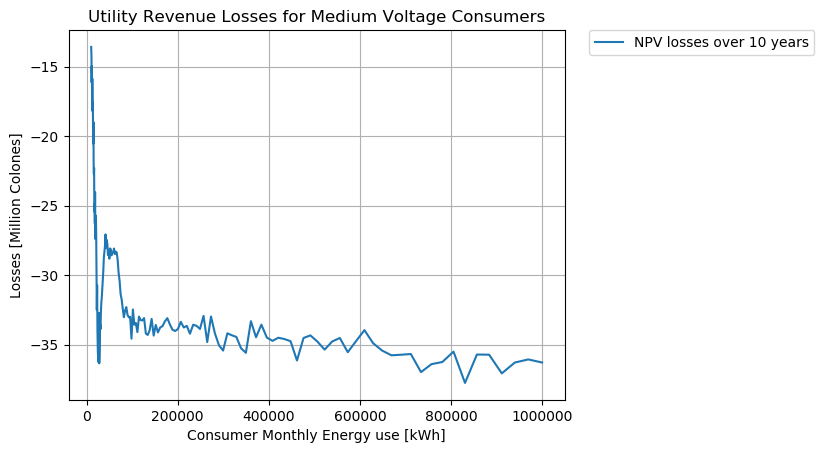

In [17]:
plot(consumption_tmt, cumulative_impact_tmt, label = "NPV losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Medium Voltage Consumers")
grid("on");